Algoritmos

In [1]:
import numpy as np

In [2]:
def knapNaiveRec(W: list[int], P: list[int], c: int, i: int):
    if i == 0 or c == 0:
        return 0
    current_item = i - 1
    if W[current_item] > c:
        return knapNaiveRec(W, P, c, current_item)
    return max(
        P[current_item] + knapNaiveRec(W, P, c - W[current_item], current_item),
        knapNaiveRec(W, P, c, current_item),
    )


def knapSackNaive(W: list[int], P: list[int], c: int):
    i = len(W)
    return knapNaiveRec(W, P, c, i)


def knapSackMemRec(W: list[int], P: list[int], c: int, i: int, M: dict):
    if i == 0 or c == 0:
        return 0
    current_item = i - 1
    if (c, i) in M:
        return M[(c, i)]
    if W[current_item] > c:
        result = knapSackMemRec(W, P, c, current_item, M)
        M[(c, i)] = result
        return result
    result = max(
        P[current_item] + knapSackMemRec(W, P, c - W[current_item], current_item, M),
        knapSackMemRec(W, P, c, current_item, M),
    )
    M[(c, i)] = result
    return result


def knapSackMem(W: list[int], P: list[int], c: int):
    i = len(W)
    M = dict()
    return knapSackMemRec(W, P, c, i, M)


def knapSacTab(W: list[int], P: list[int], c: int):
    number_of_columns = c + 1
    W2 = [0] + W
    P2 = [0] + P
    number_of_rows = len(W2)

    T = np.zeros((number_of_rows, number_of_columns), dtype=np.int32)

    for i in range(number_of_rows):
        for j in range(number_of_columns):
            if i == 0 or j == 0:
                continue
            if W2[i] <= j:
                T[i, j] = max(T[i - 1, j], P2[i] + T[i - 1, j - W2[i]])
            else:
                T[i, j] = T[i - 1, j]
    best_items = searchBestItems(T, W2)
    result = 0
    for item in best_items:
        result += P2[item]
    return result


def searchBestItems(T, W: list[int]):
    result = []
    shape = T.shape
    i = shape[0] - 1
    j = shape[1] - 1
    while i > 0 and j > 0:
        if T[i, j] != T[i - 1, j]:
            result.append(i)
            j -= W[i]
        i -= 1
    return result

Data Colection

In [3]:
import time
from numpy import random

WEIGHT_DOMAIN = 250
PROFIT_DOMAIN = 500
CAPACITY_PROBABILITY = 0.25

# defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 10

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=True):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        W = list(random.randint(WEIGHT_DOMAIN, size=size))
        P = list(random.randint(PROFIT_DOMAIN, size=size))
        c = random.randint(int(CAPACITY_PROBABILITY * size) * WEIGHT_DOMAIN)
        start = time.time()
        p = func(W, P, c)
        # print(func.__name__, size, i, p)
        end = time.time()
        t += end - start

        if debug:
            # create a variable to store the debug results
            if "DR" not in globals():
                global DR
                DR = dict()

            # add the result or check if it is the same
            if (size, i) not in DR:
                DR[(size, i)] = p
            else:
                # print("=======================")
                # print("-> Atual:", p)
                # print("-> Primeiro:", DR[(size, i)])
                # print("-> Size:", size)
                # print("-> Iteração:", i)
                assert p == DR[(size, i)]

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [
    # knapSackNaive,
    knapSackMem,
    knapSacTab,
]

sizes = [600, 700, 800, 900, 1000]

mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  knapSackMem
  >  knapSacTab

Starting collect 2
  >  knapSackMem
  >  knapSacTab

Starting collect 3
  >  knapSackMem
  >  knapSacTab

Starting collect 4
  >  knapSackMem
  >  knapSacTab

Starting collect 5
  >  knapSackMem
  >  knapSacTab

Finish data collection


Gráfico

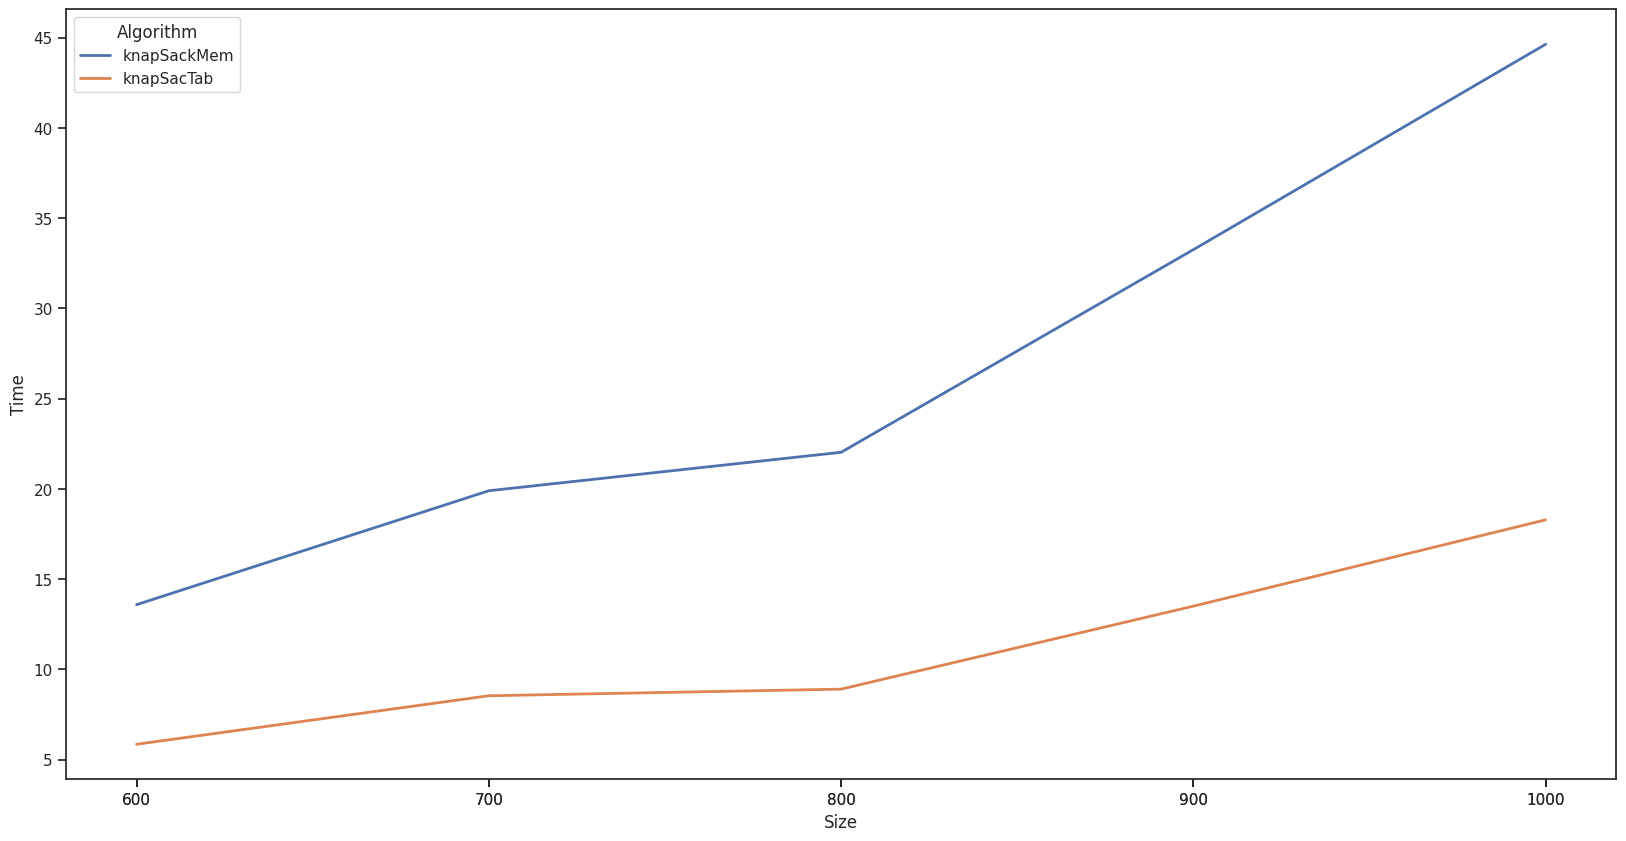

<Figure size 2000x1000 with 0 Axes>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

# Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)

# plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()